In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
testindex = test.pop("PassengerId")
trainindex = train.pop("PassengerId")
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

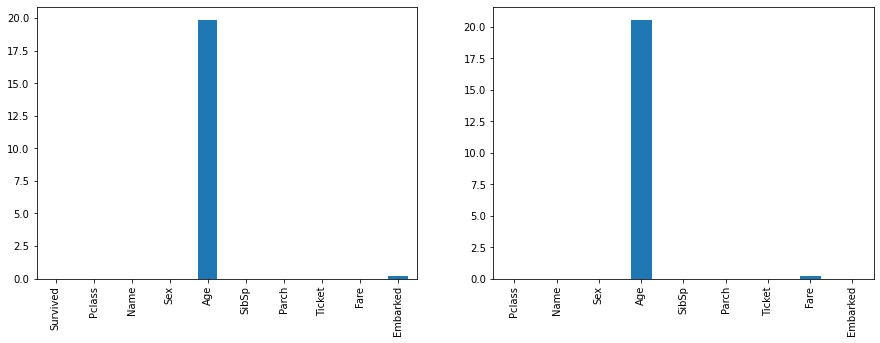

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
train_null = train.isnull().mean()*100
test_null = test.isnull().mean()*100
train_null.plot.bar(ax = ax[0])
test_null.plot.bar(ax = ax[1])

In [6]:
si = SimpleImputer(strategy = 'mean')
train['age_bool'] = (train.Age.isnull().astype(int))
train['Age'] = (si.fit_transform(train[['Age']]))
test['age_bool'] = (test.Age.isnull().astype(int))
test['Age'] = (si.fit_transform(test[['Age']]))
test['Fare'] = (si.fit_transform(test[['Fare']]))

In [7]:
train = train.dropna(axis = 0)
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
 10  age_bool  889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-nu

In [8]:
test[['Name', 'Ticket']].head(10)

,Name,Ticket
0,"Kelly, Mr. James",330911
1,"Wilkes, Mrs. James (Ellen Needs)",363272
2,"Myles, Mr. Thomas Francis",240276
3,"Wirz, Mr. Albert",315154
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298
5,"Svensson, Mr. Johan Cervin",7538
6,"Connolly, Miss. Kate",330972
7,"Caldwell, Mr. Albert Francis",248738
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",2657
9,"Davies, Mr. John Samuel",A/4 48871


In [9]:
t1  = pd.DataFrame()
t2 = pd.DataFrame()
t1['Tic'] = 'n_' + train.Ticket.astype(str)
t2['Tic'] = 'n_' + test.Ticket.astype(str)

Text(0.5, 1.0, 'Unique Coaches')

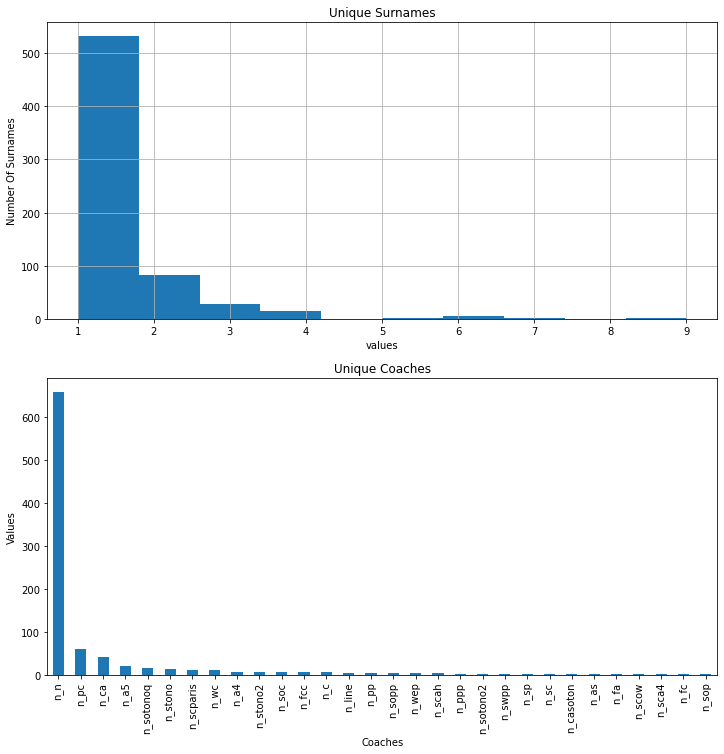

In [10]:
d = pd.DataFrame()
m = pd.DataFrame()
d['Surname'] = train.Name.str.split(',',expand = True)[0]
d['coach'] = t1.Tic.str.split(' ', expand = True)[0]
d['coach'] = d.coach.str.replace('n_\d+', 'n_n')
d['coach'] = d.coach.str.replace('[^\w\s]','')
d['coach'] = d.coach.str.lower()
m['Surname'] = test.Name.str.split(',',expand = True)[0]
m['coach'] = t2.Tic.str.split(' ', expand = True)[0]
m['coach'] = d.coach.str.replace('n_\d+', 'n_n')
m['coach'] = d.coach.str.replace('[^\w\s]','')
m['coach'] = d.coach.str.lower()
fig, ax = plt.subplots(2,1, figsize = (12,12))
d.Surname.value_counts().hist(ax = ax[0])
ax[0].set_xlabel('values')
ax[0].set_ylabel('Number Of Surnames')
ax[0].set_title('Unique Surnames')
d.coach.value_counts().plot.bar(ax = ax[1])
ax[1].set_xlabel('Coaches')
ax[1].set_ylabel('Values')
ax[1].set_title('Unique Coaches')

In [11]:
m = m.fillna('n_n')
train_ = pd.concat([train, d], axis = 1)
test_ = pd.concat([test, m], axis = 1)
train_ = train_.drop(['Name', 'Ticket'], axis = 1)
test_ = test_.drop(['Name', 'Ticket'], axis = 1)

In [12]:
lb = LabelEncoder()
train_['Surname'] = lb.fit_transform(train_.Surname)
test_['Surname'] = lb.fit_transform(test_.Surname)
train_.coach = lb.fit_transform(train_.coach)
test_.coach = lb.fit_transform(test_.coach)

In [13]:
for i in ['Sex', 'Embarked']:
    sam = pd.get_dummies(train[i], prefix = i)
    train_ = pd.concat([train_, sam], axis =1)
    sam2 = pd.get_dummies(test[i], prefix = i)
    test_ = pd.concat([test_, sam2], axis =1)

In [14]:
trainf = train_.drop(['Sex','Embarked'], axis = 1)
testf = test_.drop(['Sex', 'Embarked'], axis = 1)

print(trainf.info(),testf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   age_bool    889 non-null    int64  
 7   Surname     889 non-null    int64  
 8   coach       889 non-null    int64  
 9   Sex_female  889 non-null    uint8  
 10  Sex_male    889 non-null    uint8  
 11  Embarked_C  889 non-null    uint8  
 12  Embarked_Q  889 non-null    uint8  
 13  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 113.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------

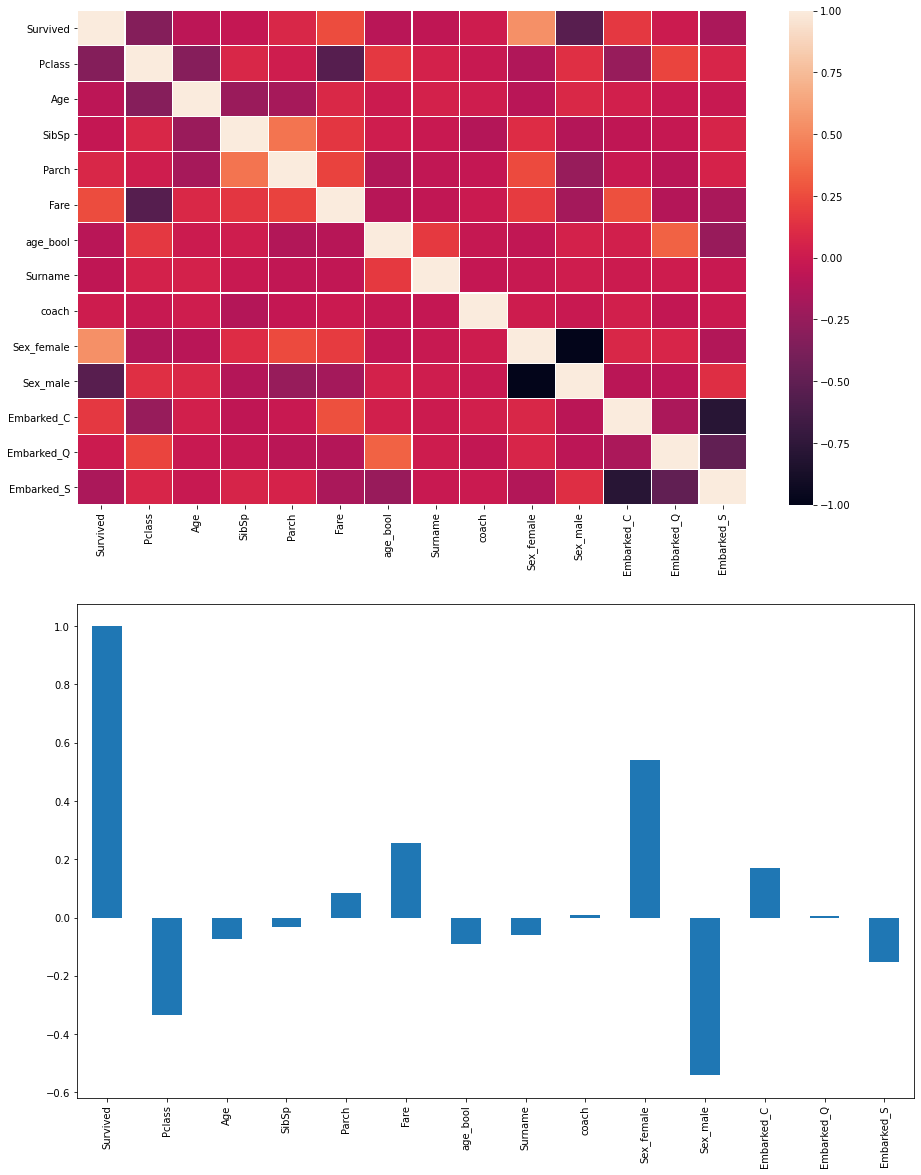

In [15]:
fig , ax = plt.subplots(2,1, figsize = (15,20))
sns.heatmap(trainf.corr(), linewidth = 0.1, ax = ax[0])
trainf.corr()['Survived'].plot.bar(ax = ax[1])

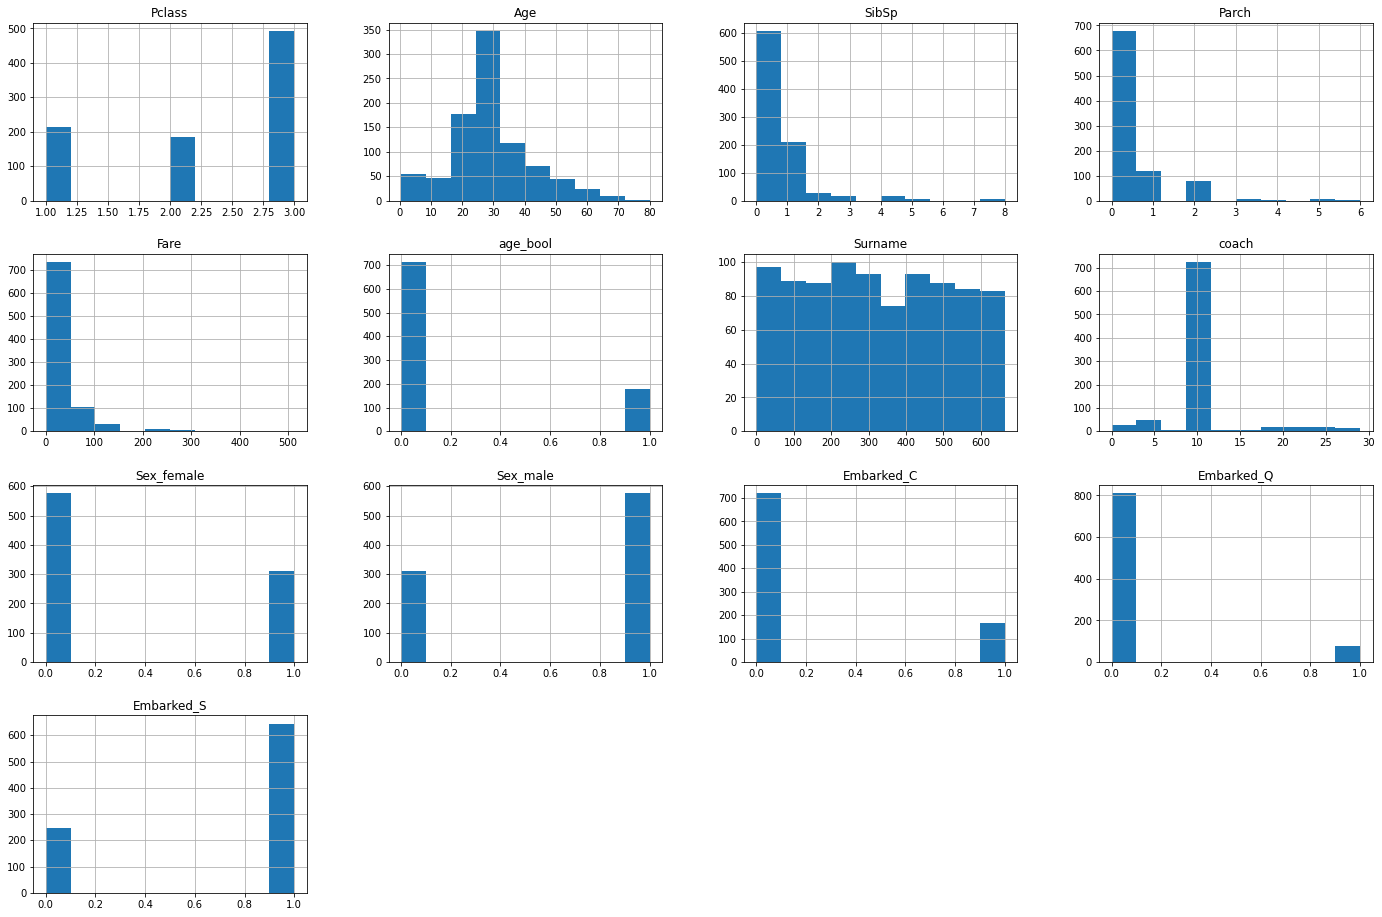

In [16]:
trainf.drop('Survived', axis = 1).hist(figsize = (24,16))
plt.show()

In [17]:
train1 = trainf.copy()
test1 = testf.copy()
Y = train1.Survived
train1 = train1.drop(['Survived','Surname'], axis = 1 )
test1 = test1.drop(['Surname'], axis = 1)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
val =int(train1.shape[0] -(train1.shape[0]*0.2))
x_train = train1.loc[:val,:]
x_test = train1.loc[val+1:,:]
y_train = Y.loc[:val]
y_test = Y.loc[val+1:]
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(711, 12) (178, 12) (711,) (178,)


In [20]:
from sklearn.metrics import log_loss
model_1 = RandomForestRegressor(n_estimators = 700)
model_1.fit(x_train, y_train)
res = model_1.predict(x_test)
score = log_loss(y_test, res)
print(score)

0.5705049273618767


In [21]:
model_2 = XGBRegressor(n_estimators = 500)
model_2.fit(x_train, y_train,eval_set = [(x_test, y_test)], early_stopping_rounds = 20)

[0]	validation_0-rmse:0.41751
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.36905
[2]	validation_0-rmse:0.34244
[3]	validation_0-rmse:0.32682
[4]	validation_0-rmse:0.32149
[5]	validation_0-rmse:0.32133
[6]	validation_0-rmse:0.31642
[7]	validation_0-rmse:0.31482
[8]	validation_0-rmse:0.31878
[9]	validation_0-rmse:0.31791
[10]	validation_0-rmse:0.32106
[11]	validation_0-rmse:0.32258
[12]	validation_0-rmse:0.32383
[13]	validation_0-rmse:0.32760
[14]	validation_0-rmse:0.32863
[15]	validation_0-rmse:0.33008
[16]	validation_0-rmse:0.33122
[17]	validation_0-rmse:0.33085
[18]	validation_0-rmse:0.33060
[19]	validation_0-rmse:0.33175
[20]	validation_0-rmse:0.33238
[21]	validation_0-rmse:0.33312
[22]	validation_0-rmse:0.33361
[23]	validation_0-rmse:0.33391
[24]	validation_0-rmse:0.33486
[25]	validation_0-rmse:0.33478
[26]	validation_0-rmse:0.33448
[27]	validation_0-rmse:0.33423
Stopping. Best iteration:
[7]	validation_0-rmse:0.31482



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = [12]),
    layers.Dense(159, kernel_initializer = 'normal', activation = 'relu'),
    layers.Dropout(0.3),
     layers.Dense(256, kernel_initializer = 'normal', activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(250, kernel_initializer = 'normal', activation = 'relu'),
    layers.BatchNormalization(),
    
     layers.Dense(150, kernel_initializer = 'normal', activation = 'relu'),
    layers.BatchNormalization(),
    
          layers.Dense(212, kernel_initializer = 'normal', activation = 'relu'),
    layers.BatchNormalization(),
    
          layers.Dense(1, activation = 'sigmoid')
])

In [23]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [24]:
early_stop = keras.callbacks.EarlyStopping(
                                    min_delta = 0.001,
                                    patience = 20,
                                    restore_best_weights = True)

In [25]:
his = model.fit(x_train, y_train,validation_data =(x_test, y_test) ,callbacks =(early_stop),batch_size = 30, epochs = 2000)

Epoch 1/2000
24/24 [==============================] - 0s 14ms/step - loss: 0.6598 - binary_accuracy: 0.6807 - val_loss: 0.6535 - val_binary_accuracy: 0.6461
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.5809 - binary_accuracy: 0.7567 - val_loss: 0.6458 - val_binary_accuracy: 0.6461
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.5102 - binary_accuracy: 0.7679 - val_loss: 0.6392 - val_binary_accuracy: 0.6461
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.5056 - binary_accuracy: 0.7918 - val_loss: 0.6379 - val_binary_accuracy: 0.6461
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.5186 - binary_accuracy: 0.7820 - val_loss: 0.6202 - val_binary_accuracy: 0.6461
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4626 - binary_accuracy: 0.7876 - val_loss: 0.6205 - val_binary_accuracy: 0.6461
Epoch 7/2000
24/24 [==============================] - 0s 5ms/st

min_loss = 0.3698279857635498
min_val_loss = 0.3600651025772095
max_accuracy 63.01720142364502
max_val_accuracy 63.99348974227905


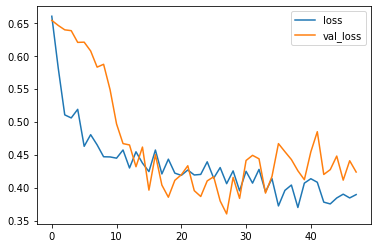

In [26]:
h = pd.DataFrame(his.history)
h.loc[:, ['loss','val_loss']].plot()
print("min_loss =", h.loss.min())
print("min_val_loss =",h.val_loss.min())
print("max_accuracy",(1-h.loss.min())*100)
print("max_val_accuracy",(1-h.val_loss.min())*100)

In [27]:
out_ = model.predict(test1)

In [28]:
out_ = out_ > 0.5
t = out_.reshape(418,)

In [29]:
output = pd.DataFrame({'PassengerId':testindex.astype("int32"),
                        'Survived':t.astype('int32')},
                   )
output.PassengerId.dtype

dtype('int32')

In [30]:
output.Survived.dtype

dtype('int32')

In [31]:
output.Survived.value_counts()

0    240
1    178
Name: Survived, dtype: int64

In [32]:
output.to_csv('submission1_13.csv',index = False)